In [1]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git >> /dev/null
!pip install np_utils >> /dev/null

  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-rgq0k3fz


In [2]:
import pylab
import matplotlib.pyplot as plt
import numpy as np
import os


"""Helper functions"""

FIG_WIDTH=20 # Width of figure
HEIGHT_PER_ROW=3 # Height of each row when showing a figure which consists of multiple rows
RESIZE_DIM=28 # The images will be resized to 28x28 pixels


def shuffle_dataset(x, y):
    
    print("Shuffling data")
    s = np.arange(x.shape[0])
    np.random.shuffle(s)
    x = x[s]
    y = y[s]
    
    return x, y


    
def plot_hist(img):
    
    img_flat = img.flatten()
    print(min(img_flat), max(img_flat))
    plt.hist(img_flat, bins=20, color='c')
    plt.title("Data distribution")
    plt.xlabel("Pixel values")
    plt.grid(True)
    plt.ylabel("Frequency")
    plt.show()
    

def create_directory(directory):
    '''
    Creates a new folder in the specified directory if the folder doesn't exist.
    INPUT
        directory: Folder to be created, called as "folder/".
    OUTPUT
        New folder in the current directory.
    '''
    if not os.path.exists(directory):
        os.makedirs(directory)

        

def show_images(images, cols = 1, titles = None, save_fig = "default", path = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
            
    USAGE: show_images(normal_images[:20], cols = 4, titles = None, save_fig="Images")
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    
    #fig.set_title("Samples of infected red blood cells")
    
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, int(np.ceil(n_images/float(cols))), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        plt.axis("off")
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    
    if path is not None: plt.savefig('{}/{}.pdf'.format(path, save_fig), dpi=300)
    plt.show()



def imshow_group(X,y,y_pred=None,n_per_row=10,phase='processed'):
    '''helper function to visualize a group of images along with their categorical true labels (y) and prediction probabilities.
    Args:
        X: images
        y: categorical true labels
        y_pred: predicted class probabilities
        n_per_row: number of images per row to be plotted
        phase: If the images are plotted after resizing, pass 'processed' to phase argument. 
            It will plot the image and its true label. If the image is plotted after prediction 
            phase, pass predicted class probabilities to y_pred and 'prediction' to the phase argument. 
            It will plot the image, the true label, and it's top 3 predictions with highest probabilities.
            
            
    USAGE: imshow_group(inp_feat, g_t)
    '''
    n_sample=len(X)
    img_dim=X.shape[1]
    j=np.ceil(n_sample/n_per_row)
    fig=plt.figure(figsize=(FIG_WIDTH,HEIGHT_PER_ROW*j))
    for i,img in enumerate(X):
        plt.subplot(j,n_per_row,i+1)
#         img_sq=np.squeeze(img,axis=2)
#         plt.imshow(img_sq,cmap='gray')
        plt.imshow(img)
        if phase=='processed':
            plt.title(y[i]) #np.argmax(y[i])
        if phase=='prediction':
            top_n=3 # top 3 predictions with highest probabilities
            ind_sorted=np.argsort(y_pred[i])[::-1]
            h=img_dim+4
            for k in range(top_n):
                string='pred: {} ({:.0f}%)\n'.format(ind_sorted[k],y_pred[i,ind_sorted[k]]*100)
                plt.text(img_dim/2, h, string, horizontalalignment='center',verticalalignment='center')
                h+=4
            if y is not None:
                plt.text(img_dim/2, -4, 'true label: {}'.format(np.argmax(y[i])), 
                         horizontalalignment='center',verticalalignment='center')
        plt.axis('off')
    plt.show()

In [3]:
from __future__ import print_function, division
import datetime
import matplotlib.pyplot as plt
import sys
import numpy as np
import os
import cv2
import scipy
import gc
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
import tensorflow_addons as tfa
import pandas as pd
from tensorflow.keras.preprocessing import image
from PIL import Image
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization

In [4]:
tf.keras.models.load_model
tf.keras.datasets.mnist
tfa.layers.InstanceNormalization
tf.keras.layers.Input
tf.keras.layers.Dense
tf.keras.layers.Reshape
tf.keras.layers.Flatten
tf.keras.layers.Dropout
tf.keras.layers.Concatenate
tf.keras.layers.BatchNormalization
tf.keras.layers.Activation
tf.keras.layers.ZeroPadding2D
tf.keras.layers.LeakyReLU
tf.keras.layers.UpSampling2D
tf.keras.layers.Conv2D
tf.keras.models.Sequential
tf.keras.models.Model
tf.keras.optimizers.Adam
tf.keras.utils.to_categorical

<function keras.utils.np_utils.to_categorical(y, num_classes=None, dtype='float32')>

In [5]:
# Training file directory
DATASET = '../input/isic2020-m-nm-12-jpg/isic2020_m_nm_512'
MODEL_PATH = '../input/pretrained-weights-repo/'
NM_PATH = '../input/isic2020-m-nm-12-jpg/isic2020_m_nm_512/nonmelanoma_isic2020/'
# load data
# x_train = np.load("{}/x_train.npy".format(PATH))
# y_train = np.load("{}/y_train.npy".format(PATH))
# x_train.shape, y_train.shape

In [6]:
# Load translation model
# b2m.h5

# model_name = 'isic2016_benign_to_malignant_cyclegan_generator.h5' # FOR ISIC 2016 DATASET
model_name = 'isic2020_NM2M.h5' # FOR ISIC 2020 DATASET

model = tf.keras.models.load_model(os.path.join(MODEL_PATH, model_name), custom_objects={'InstanceNormalization':InstanceNormalization})
# model.summary()

2022-11-27 22:57:58.133050: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
def return_list(data_path, data_type):
    file_list = [file for file in os.listdir(data_path) if file.lower().endswith(data_type)]
    # print(str(len(file_list)))
    return file_list

nm_files = return_list(NM_PATH, '.jpg')
nm_files.sort()

splits = [] #10
for i in range(0, len(nm_files), 3212):
    splits.append(nm_files[i:i+3212])
    
print(len(splits[0]))


for fold, files in enumerate(splits):
    nm_train = []
    for idx, file_name in enumerate(files):
        if not (idx % 1000):
            print(f"Loaded {idx} images")

        img_data = np.asarray(image.load_img(NM_PATH + file_name))
        img_data = cv2.resize(img_data, (256, 256), interpolation = cv2.INTER_AREA)
        nm_train.append(img_data)

    np.save(f'./non_melanoma_isic2020_256_{fold}', nm_train)

3212
Loaded 0 images
Loaded 1000 images
Loaded 2000 images
Loaded 3000 images
Loaded 0 images
Loaded 1000 images
Loaded 2000 images
Loaded 3000 images
Loaded 0 images
Loaded 1000 images
Loaded 2000 images
Loaded 3000 images
Loaded 0 images
Loaded 1000 images
Loaded 2000 images
Loaded 3000 images
Loaded 0 images
Loaded 1000 images
Loaded 2000 images
Loaded 3000 images
Loaded 0 images
Loaded 1000 images
Loaded 2000 images
Loaded 3000 images
Loaded 0 images
Loaded 1000 images
Loaded 2000 images
Loaded 3000 images
Loaded 0 images
Loaded 1000 images
Loaded 2000 images
Loaded 3000 images
Loaded 0 images
Loaded 1000 images
Loaded 2000 images
Loaded 3000 images
Loaded 0 images
Loaded 1000 images
Loaded 2000 images
Loaded 3000 images


In [8]:
def predict(model, img):
    
    if img.shape[0] != 256:
        print("Resizing image..")
        img = cv2.resize(img, (256, 256))
    
    # Normalize image as the trained distribution
    
    img = img/127.5 - 1.
    
    # Normalize imgae [0, 1]
    #img = img.astype('float32')
    #img /= 255.
    
    img = np.expand_dims(img, axis=0)
    img = model.predict(img)
    img = np.squeeze(img, axis=0)
    
    
    # Rescale to [0,1]
    #img = 0.5 * img + 0.5
    img = (img - np.min(img))/np.ptp(img)
    
    return img


def oversample(x, model, fold = None):
    '''
    Some cool stuff
    INPUT
        x: 
        model:
        
    OUTPUT
        New folder in the current directory.
    '''
    
    print(f"Fold #{fold} - Before oversampling :", x.shape)
    
    
    # majority class
    majority_samples = x
    
    # numpy array of majority classes
    majority_samples = np.array(majority_samples)
    
    # minority generated samples
    synthetic_samples = []
    
    count = 0
    # iterate over majority samples and generate minority class
    for img in tqdm(majority_samples):
        if count and not (count % 1000):
            print(f'Fold #{fold} - Synthesized {count} images!')
        
        # translate to malignant
        pred = predict(model, img)
        synthetic_samples.append(pred)
        count += 1
    
        
    assert len(majority_samples) == len(synthetic_samples), "This should be same! If not, check model code"
    synthetic_samples = np.array(synthetic_samples)
    print(f"Fold #{fold} - After oversampling: ", synthetic_samples.shape)
    
    return synthetic_samples


In [9]:
def mk_dir(dir_path):
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
    return dir_path


Fold #None - Before oversampling : (1, 256, 256, 3)


100%|██████████| 1/1 [00:00<00:00,  1.08it/s]


Fold #None - After oversampling:  (1, 256, 256, 3)


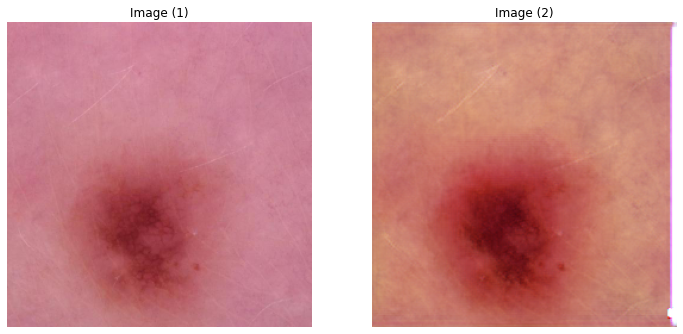

In [10]:
sample = np.asarray(image.load_img('/kaggle/input/isic2020-m-nm-12-jpg/isic2020_m_nm_512/nonmelanoma_isic2020/ISIC_0076995.jpg'))
sample = cv2.resize((sample), (256, 256))
syn = oversample(np.array([sample]), model)
show_images([sample, syn[0]], cols = 1)

In [11]:
for fold in range(0, 10):
    mk_dir(f'./synthetic_m_isic2020_{fold}/')
    nm_train = np.load(f'./non_melanoma_isic2020_256_{fold}.npy')
    m_gen = oversample(np.array(nm_train), model, fold)
    
    for idx, img_data in enumerate(m_gen):
        
        img_data = Image.fromarray((img_data*255).astype(np.uint8))
        img_data.save(f'./synthetic_m_isic2020_{fold}/ISIC_s{(fold * 3212 + (idx + 1)):07d}.jpg')


    del nm_train; z = gc.collect()
    os.system(f'rm non_melanoma_isic2020_256_{fold}.npy')

Fold #0 - Before oversampling : (3212, 256, 256, 3)


 31%|███       | 1001/3212 [02:13<04:46,  7.71it/s]

Fold #0 - Synthesized 1000 images!


 62%|██████▏   | 2001/3212 [04:27<02:38,  7.66it/s]

Fold #0 - Synthesized 2000 images!


 93%|█████████▎| 3001/3212 [06:42<00:27,  7.73it/s]

Fold #0 - Synthesized 3000 images!


100%|██████████| 3212/3212 [07:11<00:00,  7.45it/s]


Fold #0 - After oversampling:  (3212, 256, 256, 3)
Fold #1 - Before oversampling : (3212, 256, 256, 3)


 31%|███       | 1001/3212 [02:18<04:49,  7.62it/s]

Fold #1 - Synthesized 1000 images!


 62%|██████▏   | 2001/3212 [04:33<02:36,  7.72it/s]

Fold #1 - Synthesized 2000 images!


 93%|█████████▎| 3001/3212 [06:49<00:29,  7.24it/s]

Fold #1 - Synthesized 3000 images!


100%|██████████| 3212/3212 [07:17<00:00,  7.34it/s]


Fold #1 - After oversampling:  (3212, 256, 256, 3)
Fold #2 - Before oversampling : (3212, 256, 256, 3)


 31%|███       | 1001/3212 [02:14<05:55,  6.22it/s]

Fold #2 - Synthesized 1000 images!


 62%|██████▏   | 2001/3212 [04:34<02:39,  7.59it/s]

Fold #2 - Synthesized 2000 images!


 93%|█████████▎| 3001/3212 [06:49<00:27,  7.70it/s]

Fold #2 - Synthesized 3000 images!


100%|██████████| 3212/3212 [07:18<00:00,  7.33it/s]


Fold #2 - After oversampling:  (3212, 256, 256, 3)
Fold #3 - Before oversampling : (3212, 256, 256, 3)


 31%|███       | 1001/3212 [02:15<04:53,  7.53it/s]

Fold #3 - Synthesized 1000 images!


 62%|██████▏   | 2001/3212 [04:30<02:36,  7.72it/s]

Fold #3 - Synthesized 2000 images!


 93%|█████████▎| 3001/3212 [06:47<00:29,  7.14it/s]

Fold #3 - Synthesized 3000 images!


100%|██████████| 3212/3212 [07:23<00:00,  7.24it/s]


Fold #3 - After oversampling:  (3212, 256, 256, 3)
Fold #4 - Before oversampling : (3212, 256, 256, 3)


 31%|███       | 1001/3212 [02:14<04:49,  7.63it/s]

Fold #4 - Synthesized 1000 images!


 62%|██████▏   | 2001/3212 [04:30<02:34,  7.85it/s]

Fold #4 - Synthesized 2000 images!


 93%|█████████▎| 3001/3212 [06:47<00:27,  7.74it/s]

Fold #4 - Synthesized 3000 images!


100%|██████████| 3212/3212 [07:16<00:00,  7.36it/s]


Fold #4 - After oversampling:  (3212, 256, 256, 3)
Fold #5 - Before oversampling : (3212, 256, 256, 3)


 31%|███       | 1001/3212 [02:19<07:26,  4.95it/s]

Fold #5 - Synthesized 1000 images!


 62%|██████▏   | 2001/3212 [04:38<02:39,  7.61it/s]

Fold #5 - Synthesized 2000 images!


 93%|█████████▎| 3001/3212 [06:56<00:27,  7.62it/s]

Fold #5 - Synthesized 3000 images!


100%|██████████| 3212/3212 [07:29<00:00,  7.15it/s]


Fold #5 - After oversampling:  (3212, 256, 256, 3)
Fold #6 - Before oversampling : (3212, 256, 256, 3)


 31%|███       | 1001/3212 [02:15<05:01,  7.35it/s]

Fold #6 - Synthesized 1000 images!


 62%|██████▏   | 2001/3212 [04:32<02:36,  7.73it/s]

Fold #6 - Synthesized 2000 images!


 93%|█████████▎| 3001/3212 [06:53<00:27,  7.63it/s]

Fold #6 - Synthesized 3000 images!


100%|██████████| 3212/3212 [07:22<00:00,  7.26it/s]


Fold #6 - After oversampling:  (3212, 256, 256, 3)
Fold #7 - Before oversampling : (3212, 256, 256, 3)


 31%|███       | 1001/3212 [02:16<05:20,  6.89it/s]

Fold #7 - Synthesized 1000 images!


 62%|██████▏   | 2001/3212 [04:32<02:43,  7.42it/s]

Fold #7 - Synthesized 2000 images!


 93%|█████████▎| 3001/3212 [06:51<00:28,  7.42it/s]

Fold #7 - Synthesized 3000 images!


100%|██████████| 3212/3212 [07:20<00:00,  7.29it/s]


Fold #7 - After oversampling:  (3212, 256, 256, 3)
Fold #8 - Before oversampling : (3212, 256, 256, 3)


 31%|███       | 1001/3212 [02:19<04:50,  7.60it/s]

Fold #8 - Synthesized 1000 images!


 62%|██████▏   | 2001/3212 [04:37<02:40,  7.56it/s]

Fold #8 - Synthesized 2000 images!


 93%|█████████▎| 3001/3212 [06:56<00:28,  7.47it/s]

Fold #8 - Synthesized 3000 images!


100%|██████████| 3212/3212 [07:27<00:00,  7.18it/s]


Fold #8 - After oversampling:  (3212, 256, 256, 3)
Fold #9 - Before oversampling : (3212, 256, 256, 3)


 31%|███       | 1001/3212 [02:23<04:57,  7.42it/s]

Fold #9 - Synthesized 1000 images!


 62%|██████▏   | 2001/3212 [04:49<02:40,  7.54it/s]

Fold #9 - Synthesized 2000 images!


 93%|█████████▎| 3001/3212 [07:09<00:27,  7.59it/s]

Fold #9 - Synthesized 3000 images!


100%|██████████| 3212/3212 [07:39<00:00,  7.00it/s]


Fold #9 - After oversampling:  (3212, 256, 256, 3)


In [12]:
print("Done!")

Done!
